In [1]:
import numpy as np
import pandas as pd
from importer_snippets import load_experiment
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
#plt.style.use('JGW')
import os
os.getcwd()

'/Users/edwardmu/OneDrive - Stanford/Classes/Chem 274 - Echem Lab/Project/Github/CHEM274-20211130'

# Cyclic Voltammograms

In [79]:
CV = load_experiment()

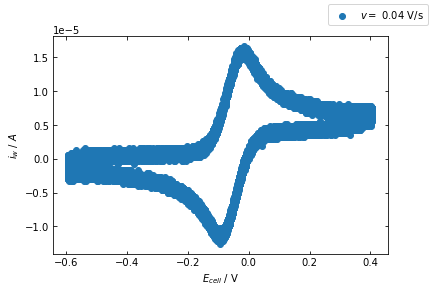

In [80]:
# Plot CV Data
fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Cyclic Voltammogram')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.style.use('JGW')
fig.legend()

In [81]:
#Display CV Data
CV.data

,E_program,Ecell,iw,t
0,-0.500000,-0.592946,-1.049353e-06,0.000000
1,-0.500000,-0.593604,-7.204973e-07,0.000278
2,-0.500000,-0.593604,-7.204973e-07,0.000556
3,-0.500000,-0.593604,-7.204973e-07,0.000833
4,-0.500000,-0.593275,-7.204973e-07,0.001111
...,...,...,...,...
187195,-0.499956,-0.593275,-2.364774e-06,51.998611
187196,-0.499967,-0.593933,-2.035918e-06,51.998889
187197,-0.499978,-0.593275,-2.693629e-06,51.999167
187198,-0.499989,-0.593933,-2.035918e-06,51.999444


In [82]:
#Carry out iR correction

R_u = 4.44e+02
CV.data['Ecell'] = CV.data['Ecell'] - CV.data['iw']*R_u

In [83]:
#Carry out offset operation
#The difference in E1/2 is 0.094010 V. 
#Potentials from week 4 will be subtracted by this value to return potentials referenced to week 3's 
#reference electrode.

#CV.data['Ecell'] = CV.data['Ecell'] - 0.094010

In [84]:
CV.to_csv('/Users/edwardmu/OneDrive - Stanford/Classes/Chem 274 - Echem Lab/Project/Github/CHEM274-20211130/CV Week 4 Offsetting/__09-02 through 09-06/CV_FcStar_GC_MeAc_0.04Vs-1_P-09-06',
         dirname = 'iR-Corrected Data')

### Find CV Peaks

In [85]:
# Smooth data using the Savitski Golay method
smooth_iw = savgol_filter(CV.data['iw'], 25, 2)
# Check the result
# plt.plot(CV.data['Ecell'], smooth_iw, zorder=1, color='r')
# plt.plot(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s', zorder=0)
# plt.xlim(-.75, -.74)
# plt.ylim(.00003, .00004)

# Maxima
find_ipa = find_peaks(smooth_iw, height=0, width=500) # Must give minimum height to get peak_heights dict.
ipa, Epa = CV.data['iw'][find_ipa[0]].to_numpy(), CV.data['Ecell'][find_ipa[0]].to_numpy()

# Invert signal to find minima - Signals are negative but indicies are correct!
find_ipc = find_peaks(-smooth_iw, height=0, width=500) # Remember to un-invert anytime if calling ipc values from find_ipc, but not indicies.
ipc, Epc = CV.data['iw'][find_ipc[0]].to_numpy(), CV.data['Ecell'][find_ipc[0]].to_numpy()

peaks = {'ipa': ipa[0], 'Epa': Epa[0], 'ipc': ipc[0], 'Epc': Epc[0]}
# df = pd.DataFrame(data=peaks, index=[CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()]) # Gives a little table, but rounds values...
print(peaks)



{'ipa': 1.6051121189801995e-05, 'Epa': -0.029180177376040787, 'ipc': -1.1901575871659547e-05, 'Epc': -0.09109047384957696}


#### Peak picking and figure saving

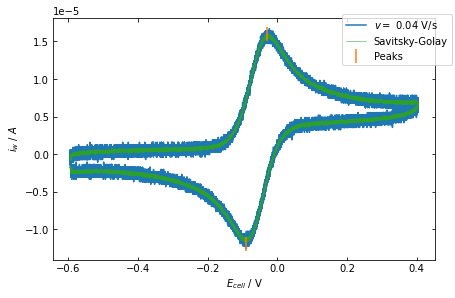

Save the figure?n
Not saved


In [86]:
# Draw same plot as above, but with peaks
fig = plt.figure()
ax = fig.add_subplot()

ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.plot(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s', zorder=0)
ax.plot(CV.data['Ecell'], smooth_iw, color='C2', label='Savitsky-Golay', lw=.5, zorder=.5)
ax.scatter([*Epa, *Epc], [*ipa, *ipc], color='C1', label='Peaks', marker='|', s=200, zorder=1)
fig.tight_layout()

# ax.set_title('Cyclic Voltammogram')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.legend(loc=(0.75, 0.78))

analyte = 'FcStar_'
electrode = 'GC_'
solvent = 'MeAc'
notebook = '_P-09-03'

plt.show()
save_CV_fig(fig, analyte, electrode, solvent, notebook)
#save_CV_fig(fig, )

In [16]:
def save_CV_fig(fig, analyte, electrode, solvent, notebook):
    ans = input('Save the figure?')
    if ans in ['y', 'yes', 'Yes', 'yeye', 'yeah', 'why, certainly', True]:
        fig.savefig("C:\\Users\\jgage\\Documents\GitHub\\CHEM274\\data\\figs\\CV_"+
            analyte + electrode + solvent +
            str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + 'Vs-1_'+
                notebook+'.jpg')
        print('Saved')
    else:
        print('Not saved')

##### 